# Career Longevity Predictions for NBA Rookies

## Abstract
The purpose of this project is to build a binary classification model to predict if an NBA rookie will last 5 years in the NBA League based on the data provided from [Data world](https://data.world/exercises/logistic-regression-exercise-1)


#### Main Focus:
1. features selection using heatmap correlation
2. build several models (knn, logistic regression, decision tree, random forest)
3. choose best model

pros and cons of each model



## Data

Variable|Description|
-----|-----|
Name| Player name|
GP| Games played|
MIN| Minutes played|
PTS| Points per game|
FGM| Field goals made|
FGA| Field goal attempts|
FG%| Field goal percent|
3P Made| 3-points made|
3PA| 3-point attempts|
3P%| 3-points attempt percent|
FTM| Free throws made|
FTA| Free throw attempts|
FT%| Free throw percent|
OREB| Offensive rebounds|
DREB| Defensive rebounds|
REB| Rebounds|
AST| Assists|
STL| Steals|
BLK| Blocks|
TOV| Turnovers|
TARGET_5Yrs| 1 if career length >= 5, 0 otherwise|

## Table of Contents
1. Data Acquisition
2. Data Cleaning
3. Data Exploration
4. Build Models
5. Tune Model
6. Model Evaluation and Selection
7. Conclusions

## 1. Data Acquisition

### 1.1 Import Libraries

In [1]:
# import pandas as pd 
# import numpy as np 
# import matplotlib.pyplot as plt 
# import seaborn as sns


# from sklearn.model_selection import train_test_split # split  data into training and testing sets
# from sklearn.linear_model import LogisticRegression # import Logistic regression from sklearn

# import sklearn.metrics as metrics # import metrics 

# from sklearn.preprocessing import MinMaxScaler #import min max scaler

# from sklearn.metrics import confusion_matrix#confusion matrix


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import warnings # import warnings
warnings.filterwarnings('ignore')

### 1.2 Read Data

In [3]:
# load dataset
df = pd.read_csv('./data/nba_logreg.csv')
nba = df.copy()

In [4]:
# preview data
nba.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [5]:
# get info about dataframe
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [6]:
# get descriptive statistics
nba.describe().round(3)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000,1340.000,1340.000,1340.000,1340.000,1340.000,1340.000,1340.000,1329.000,1340.000,1340.000,1340.000,1340.000,1340.000,1340.000,1340.000,1340.000,1340.000,1340.000,1340.000
mean,60.414,17.625,6.801,2.629,5.885,44.169,0.248,0.779,19.308,1.298,1.822,70.300,1.009,2.026,3.034,1.551,0.619,0.369,1.194,0.620
std,17.434,8.308,4.358,1.684,3.593,6.138,0.384,1.062,16.023,0.987,1.323,10.578,0.777,1.360,2.058,1.471,0.410,0.429,0.723,0.486
min,11.000,3.100,0.700,0.300,0.800,23.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.300,0.000,0.000,0.000,0.100,0.000
25%,47.000,10.875,3.700,1.400,3.300,40.200,0.000,0.000,0.000,0.600,0.900,64.700,0.400,1.000,1.500,0.600,0.300,0.100,0.700,0.000
50%,63.000,16.100,5.550,2.100,4.800,44.100,0.100,0.300,22.400,1.000,1.500,71.250,0.800,1.700,2.500,1.100,0.500,0.200,1.000,1.000
75%,77.000,22.900,8.800,3.400,7.500,47.900,0.400,1.200,32.500,1.600,2.300,77.600,1.400,2.600,4.000,2.000,0.800,0.500,1.500,1.000
max,82.000,40.900,28.200,10.200,19.800,73.700,2.300,6.500,100.000,7.700,10.200,100.000,5.300,9.600,13.900,10.600,2.500,3.900,4.400,1.000


## 2. Data Cleaning and Exploration

### Rename columns

In [7]:
# get columns
nba.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [8]:
# rename columns
nba = nba.rename(columns = {'FG%':'FG_Percent',
                            '3P Made':'3P_Made',
                            '3P%':'3P_Percent',
                            'FT%':'FT_Percent'})

# check results
nba.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_Percent', '3P_Made',
       '3PA', '3P_Percent', 'FTM', 'FTA', 'FT_Percent', 'OREB', 'DREB', 'REB',
       'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs'],
      dtype='object')

### Change datatype

In [9]:
# change data type of `TARGET_5Yrs` from float to int
nba.TARGET_5Yrs = nba.TARGET_5Yrs.astype('int')

In [10]:
nba.head()

,Name,GP,MIN,PTS,FGM,FGA,FG_Percent,3P_Made,3PA,3P_Percent,FTM,FTA,FT_Percent,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


### Check missing and duplicate values

In [11]:
# check missing values
nba.isna().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG_Percent      0
3P_Made         0
3PA             0
3P_Percent     11
FTM             0
FTA             0
FT_Percent      0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [12]:
# drop missing values
nba = nba.dropna()

# check result
nba.isna().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG_Percent     0
3P_Made        0
3PA            0
3P_Percent     0
FTM            0
FTA            0
FT_Percent     0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [13]:
# check duplicates
nba.duplicated().sum()

11

In [14]:
# drop duplicates
nba = nba.drop_duplicates()

# check result
nba.duplicated().sum()

0

## 3. Data Exploration and Visualization

### Check class imbalance

In [23]:
# check class imbalance
nba['TARGET_5Yrs'].value_counts(normalize=True)

1    0.621396
0    0.378604
Name: TARGET_5Yrs, dtype: float64

We can see that there is a bit imbalance in our data, so we will stratify the training and testing sets

### Check average stats by successful/unsuccesful players

In [15]:
# average stats grouped by `TARGET_5Yrs`
average_stats = nba.groupby('TARGET_5Yrs').mean().T.reset_index().melt(id_vars=['index'], value_vars=[0,1])

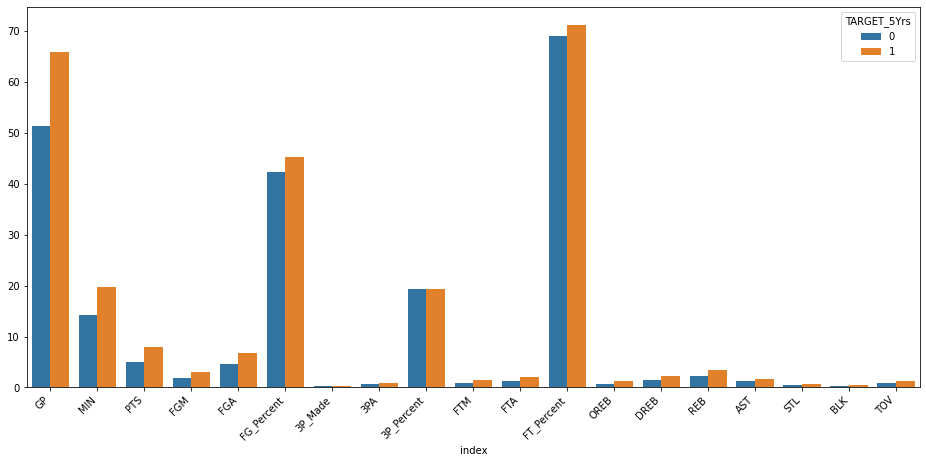

In [16]:
# visualize proportions between features

# plot size
plt.figure(figsize=(16, 7))

# set x and y variables
ax = sns.barplot(data=average_stats,
                 x=average_stats['index'],
                 y=average_stats['value'],
                 orient='v', hue=average_stats['TARGET_5Yrs']);

# set axis labels and title
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.title('');

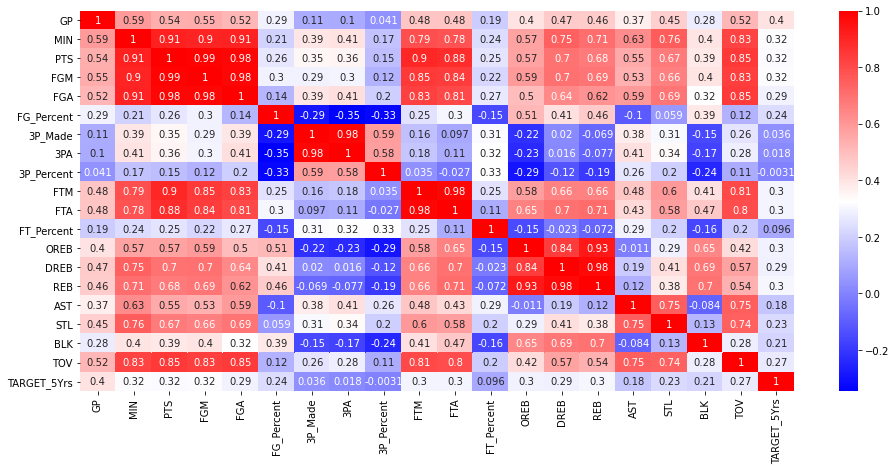

In [17]:
# visualize correlation heatmap
plt.figure(figsize=(16, 7))
sns.heatmap(nba.corr(), annot=True, cmap='bwr');

## 4. Model Building

In [19]:
# split data into train and test sets

In [20]:
# Labels and features split
X = nba.drop(['Name','TARGET_5Yrs'], axis=1)
y = nba['TARGET_5Yrs']

In [21]:
# check independent variables
X.head()

,GP,MIN,PTS,FG_Percent,3P_Made,3P_Percent,FTM,FT_Percent,OREB,DREB,AST,STL,BLK,TOV
0,36,27.4,7.4,34.7,0.5,25.0,1.6,69.9,0.7,3.4,1.9,0.4,0.4,1.3
1,35,26.9,7.2,29.6,0.7,23.5,2.6,76.5,0.5,2.0,3.7,1.1,0.5,1.6
2,74,15.3,5.2,42.2,0.4,24.4,0.9,67.0,0.5,1.7,1.0,0.5,0.3,1.0
3,58,11.6,5.7,42.6,0.1,22.6,0.9,68.9,1.0,0.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,52.4,0.0,0.0,1.3,67.4,1.0,1.5,0.3,0.3,0.4,0.8


In [22]:
# check dependent variables
y.head()

0    0
1    0
2    0
3    1
4    1
Name: TARGET_5Yrs, dtype: int32

In [28]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### K-Nearest Neighbours

### Logistic Regression

In [25]:
# fit training data to logreg model
logreg_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [26]:
# get predictions from test set
y_pred = logreg_clf.predict(X_test)

### Decision Tree

### Random Forest

## 5. Hyperparameter Tuning

### K-Nearest Neighbours

### Logistic Regression

In [ ]:
# Create hyperparameter options
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

# Apply grid search
log_clf = GridSearchCV(LogisticRegression(), grid, cv=5, verbose=0)

#Fit
log_clf.fit(X_train, y_train)

In [ ]:
#print the best estimator
log_clf.best_estimator_

In [ ]:
#evaluating the performance of the best estimator
log_clf1 = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
log_clf1.fit(X_train, y_train)
y_pred = log_clf1.predict(X_test)
accuracy_score(y_pred, y_test)

### Decision Tree

### Random Forest

## 6. Model Evaluation and Selection

## 7. Conclusion